In [1]:
import tkinter as tk
from tkinter import filedialog
import glob
from pathlib import Path
import h5py
import numpy as np
from PIL import Image, ImageDraw
import cv2

In [8]:
HDF5_PATH = "/mnt/d/Datasets/PVDN/images_hdf5/PVDN_images_labels_final.hdf5"
DATASET_NAME = "PVDN"
DATASET_SIZE = 59746
DATASET_IMAGE_WIDTH = 1280
DATASET_IMAGE_HEIGHT = 960

CLASS = ["headlight", "taillight", "other"]
CLASS_COLOR = {"headlight":0x00FF00, "taillight":0xFF0000, "other":0x0000FF}

Dataset has 59746 images and 59746 labels


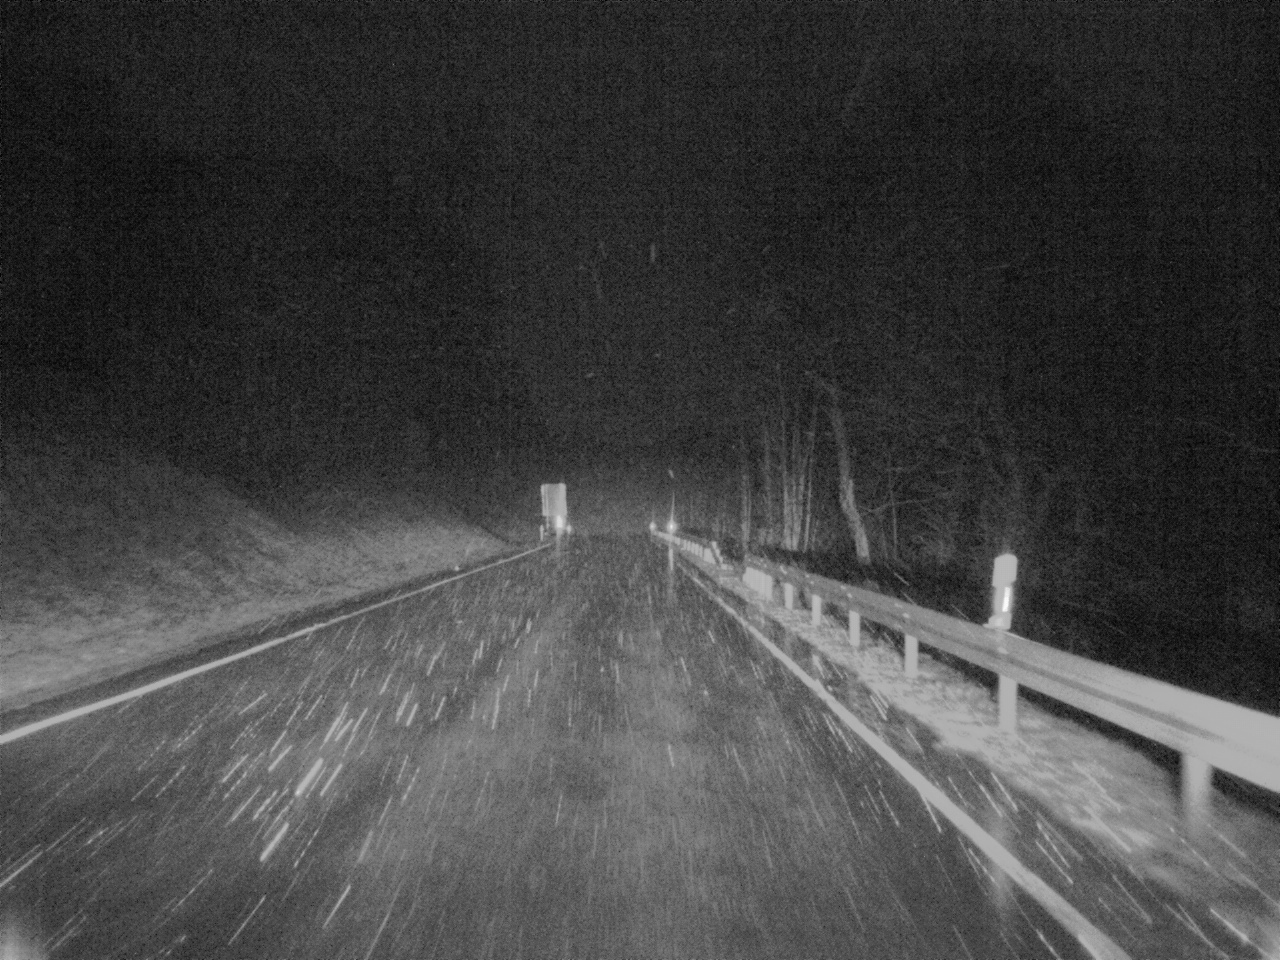

Processed image 1000
Processed image 2000
Processed image 3000
Processed image 4000
Processed image 5000
Processed image 6000
Processed image 7000
Processed image 8000
Processed image 9000
Processed image 10000
Processed image 11000
Processed image 12000
Processed image 13000
Processed image 14000
Processed image 15000
Processed image 16000
Processed image 17000
Processed image 18000
Processed image 19000
Processed image 20000
Processed image 21000
Processed image 22000
Processed image 23000
Processed image 24000
Processed image 25000
Processed image 26000
Processed image 27000
Processed image 28000
Processed image 29000
Processed image 30000
Processed image 31000
Processed image 32000
Processed image 33000
Processed image 34000
Processed image 35000
Processed image 36000
Processed image 37000
Processed image 38000
Processed image 39000
Processed image 40000
Processed image 41000
Processed image 42000
Processed image 43000
Processed image 44000
Processed image 45000
Processed image 460

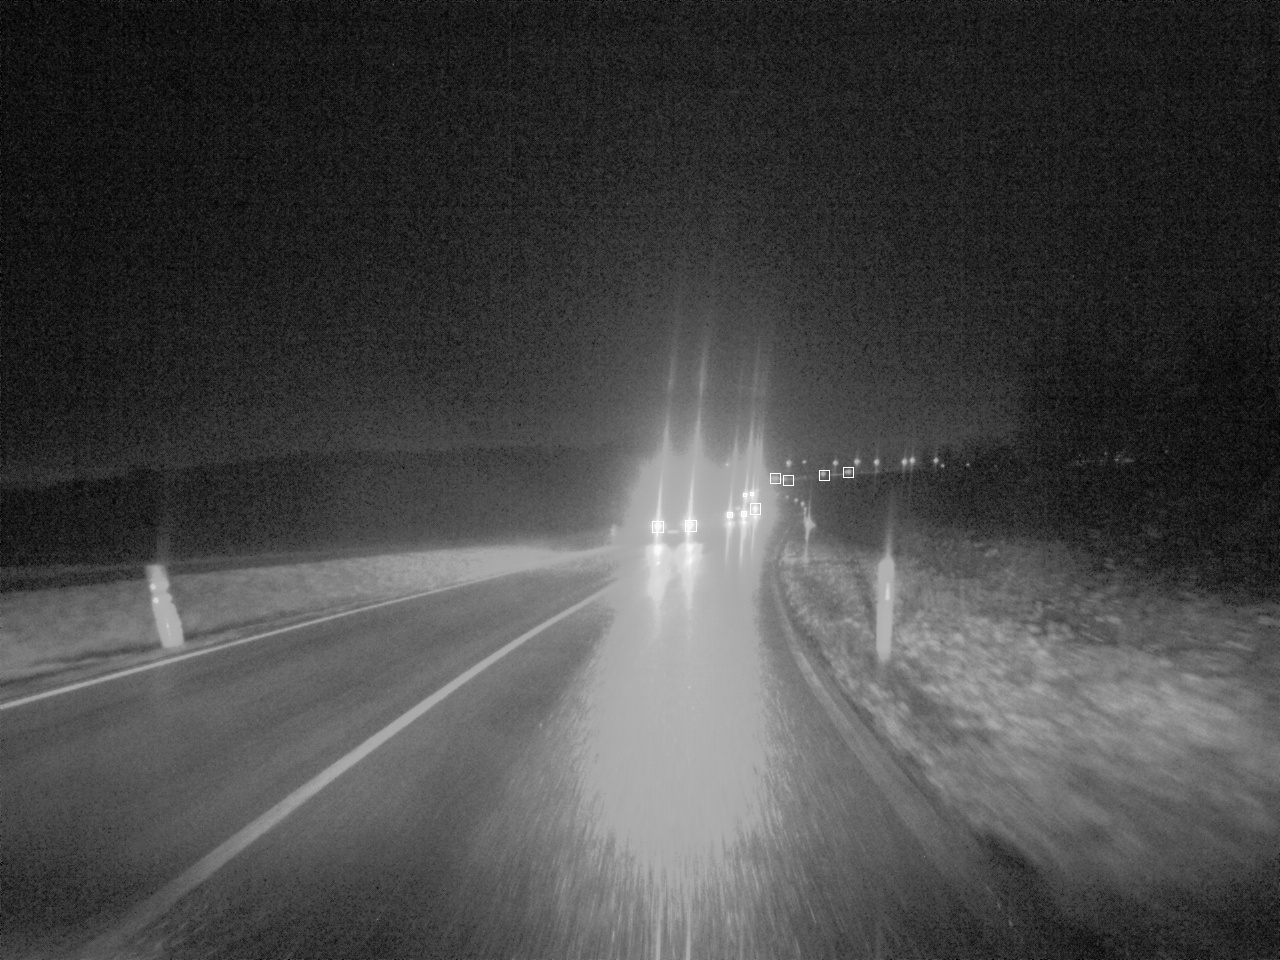

Data processing completed.


In [12]:
# Open the HDF5 file in read mode
with h5py.File(HDF5_PATH, "r") as hf:
    # Access the group containing the dataset
    group = hf[DATASET_NAME]

    # Access the datasets
    image_dataset = group["images"]
    label_dataset = group["labels"]

    image_dataset_size = image_dataset.shape[0]
    label_dataset_size = label_dataset.shape[0]

    assert (image_dataset_size == label_dataset_size)
    assert (image_dataset_size == DATASET_SIZE)

    print(f"Dataset has {image_dataset_size} images and {label_dataset_size} labels")

    for i in range(image_dataset_size):
        # Processing images
        image_bytes = image_dataset[i]
        

        # Processing labels
        # Get the labels for the current entry
        labels = label_dataset[i]
        

        if i == 0 or i == DATASET_SIZE-1:
            image_array = cv2.imdecode(image_bytes, cv2.IMREAD_GRAYSCALE)
            # Convert the NumPy array to an image object
            image = Image.fromarray(image_array)

            if len(labels):
                # Split the byte string into individual lines
                labels = labels.split(b'\n')

                # Parse each line as a numpy array
                labels_array = [np.fromstring(label, dtype=float, sep=' ') for label in labels]

                # Convert the list of arrays into a 2D numpy array
                labels_array = np.array(labels_array)
                # Create an ImageDraw object
                draw = ImageDraw.Draw(image)
                for label in labels_array:
                    class_label, x, y, w, h = np.nan_to_num(label)
                    x_min = x * float(DATASET_IMAGE_WIDTH) - w * float(DATASET_IMAGE_WIDTH) / 2.0
                    y_min = y * float(DATASET_IMAGE_HEIGHT) - h * float(DATASET_IMAGE_HEIGHT) / 2.0
                    x_max = x * float(DATASET_IMAGE_WIDTH) + w * float(DATASET_IMAGE_WIDTH) / 2.0
                    y_max = y * float(DATASET_IMAGE_HEIGHT) + h * float(DATASET_IMAGE_HEIGHT) / 2.0
                    light_class = CLASS[int(class_label)]
                    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline=CLASS_COLOR[light_class])
            # Display the image
            image.show()
        
        if (i + 1) % 1000 == 0:
            print(f"Processed image {i+1}")

    print("Data processing completed.")